In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [29]:
file = 'time_series_immunitywaning_nobooster.txt'

with open(file, 'rb') as f:
    result = pickle.load(f)
times, pop_evol, sevol = result['times'], np.array(result['evol']),  np.array(result['sevol'])

In [30]:
def calculate_s(pop, beta, a):
    x = pop[:,0]+pop[:,8]
    return(a/(beta*x))

def calculate_RWT(pop, beta, a, sevol):
    x = pop[:,0]+pop[:,8]
    #sevol = calculate_s(pop,beta,a)
    return(sevol*beta*x/a)

def calculate_RMT(pop, beta, a, sevol):
    x = pop[:,0]+pop_evol[:,4]+pop_evol[:,6]+pop[:,8]+pop_evol[:,12]+pop_evol[:,14]
    #sevol = calculate_s(pop,beta,a)
    return(sevol*x*beta/a)

beta = 3*0.25/1e6
a = 0.25

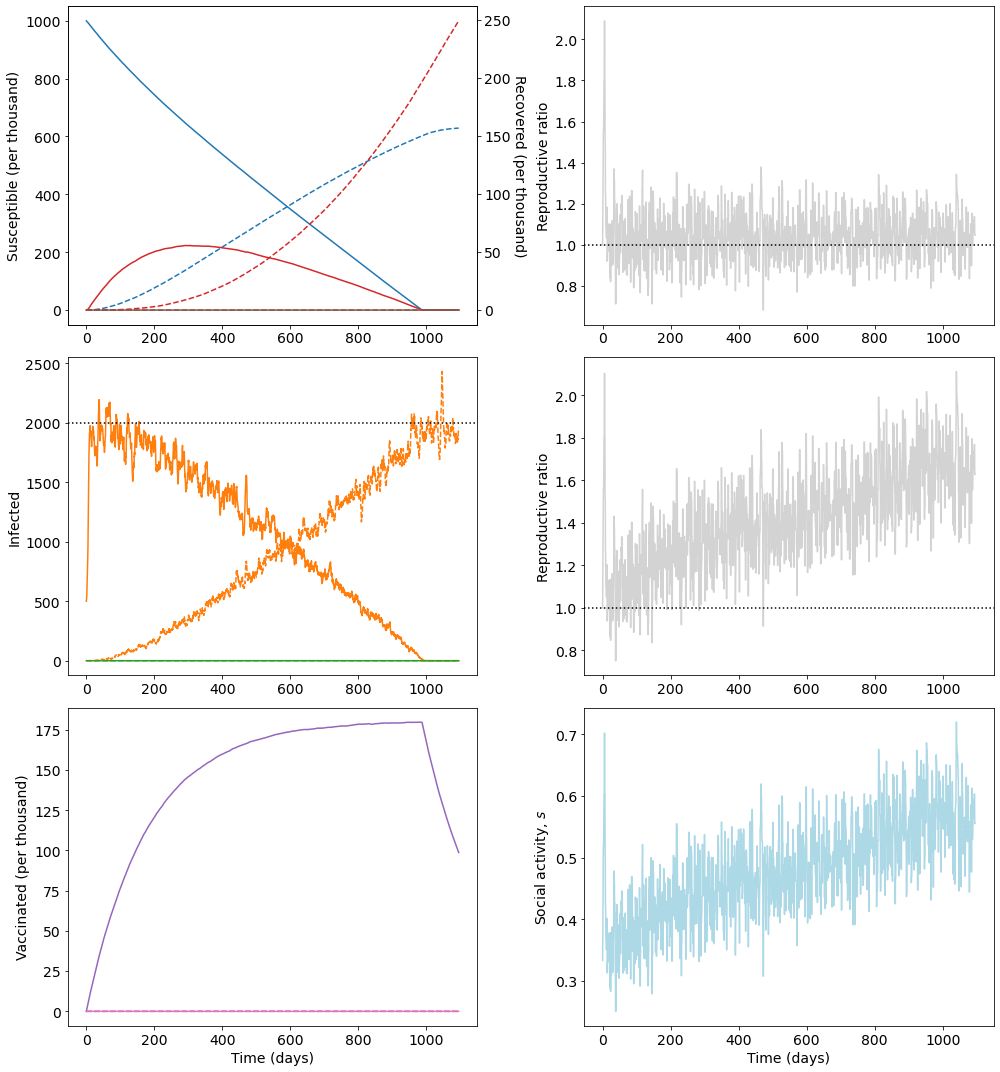

In [34]:
fig, ax = plt.subplots(3,2,figsize=(14,15))

# plotting susceptible
ax[0,0].plot(times, np.array(pop_evol[:,0])/1e3, c = 'C0')
ax[0,0].plot(times, np.array(pop_evol[:,8])/1e3, c = 'C0', linestyle = 'dashed')
ax[0,0].set_ylabel('Susceptible (per thousand)', fontsize = 14)

# plotting recovered
ax_z = ax[0,0].twinx()
ax_z.plot(times, np.array(pop_evol[:,4])/1e3, c = 'C3')
ax_z.plot(times, np.array(pop_evol[:,5])/1e3, c = 'C5')

ax_z.plot(times, np.array(pop_evol[:,12])/1e3, c = 'C3', linestyle = 'dashed')
ax_z.plot(times, np.array(pop_evol[:,13])/1e3, c = 'C5', linestyle = 'dashed')

ax_z.set_ylabel('Recovered (per thousand)', rotation = 270, labelpad = 15, fontsize = 14)

ax[1,0].plot(times, pop_evol[:,1], c = 'C1')
ax[1,0].plot(times, pop_evol[:,2]+pop_evol[:,3], c = 'C2')
ax[1,0].plot(times, pop_evol[:,9], c = 'C1', linestyle = 'dashed')
ax[1,0].plot(times, pop_evol[:,10]+pop_evol[:,11], c = 'C2', linestyle = 'dashed')
ax[1,0].axhline(2000, c = 'k', linestyle = 'dotted')

#ax[1,0].legend(['Infected with WT $y_1$', 'Infected with MT $y2$',
#               'Infected with WT $y_1$ (waned)', 'Infected with MT $y2$ (waned)'], fontsize = 8, loc = 'upper right')

ax[1,0].set_ylabel('Infected', fontsize = 14)

ax[2,0].plot(times, pop_evol[:,6]/1e3, c = 'C4')
ax[2,0].plot(times, pop_evol[:,7]/1e3, c = 'C6')
ax[2,0].plot(times, pop_evol[:,14]/1e3, c = 'C4', linestyle = 'dashed')
ax[2,0].plot(times, pop_evol[:,15]/1e3, c = 'C6', linestyle = 'dashed')

ax[2,0].set_ylabel('Vaccinated (per thousand)', fontsize = 14)
#ax[2,0].legend(['Vaccinated $w_1$', 'Vaccinated, Recovered from MT $w_2$',
#               'Vaccinated $w_1$ (boosted)', 'Vaccinated, Recovered from MT $w_2$ (boosted)',], fontsize = 10)

ax[0,1].plot(times, calculate_RWT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[0,1].axhline(1., linestyle = 'dotted', c = 'k')
ax[0,1].set_ylabel('Reproductive ratio', fontsize = 14)

ax[1,1].plot(times, calculate_RMT(pop_evol, beta, a, sevol), c = 'lightgrey')
ax[1,1].axhline(1., linestyle = 'dotted', c = 'k')
ax[1,1].set_ylabel('Reproductive ratio', fontsize = 14)

ax[2,1].plot(times, sevol,  c='lightblue')
ax[2,1].set_ylabel('Social activity, $s$', fontsize = 14)

ax[2,0].set_xlabel('Time (days)', fontsize = 14)
ax[2,1].set_xlabel('Time (days)', fontsize = 14)

for i in range(3):
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)
        
ax_z.tick_params(labelsize = 14)

plt.tight_layout()
plt.savefig('timeseries_immunitywaning_nobooster_SEPT13.jpg')